# Hasse diagram

Testing some ideas for how to convert a directed graph into a Hasse diagram.  Also want to make nice drawing methods 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

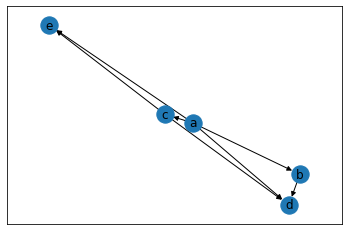

In [21]:
H = nx.DiGraph()
H.add_nodes_from('abcde')
H.add_edges_from(('ab','ac','cd','ad','ce', 'ae', 'bd'))

nx.draw_networkx(H)

In [22]:
for p in nx.all_simple_paths(H,'a','d'):
    print(p)

['a', 'b', 'd']
['a', 'c', 'd']
['a', 'd']


In [23]:
# get rid of unnecessary edges.... does order matter here? Is this the correct diagram?
def returnHasse(H):
    edges = list(H.edges)
    for e in edges: 
        print('\n',e)
        paths = nx.all_simple_paths(H,*e)
        for p in paths:
            if not list(p) == list(e):
                H.remove_edge(*e)
                print('Deleted', e)
                break
    return H



 ('a', 'b')

 ('a', 'c')

 ('a', 'd')
Deleted ('a', 'd')

 ('a', 'e')
Deleted ('a', 'e')

 ('b', 'd')

 ('c', 'd')

 ('c', 'e')


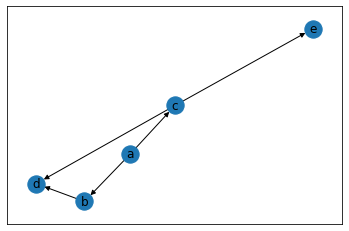

In [24]:
nx.draw_networkx(returnHasse(H))

# Automatically determining level given the Hasse diagram 

In [47]:
A = nx.shortest_path_length(H,target = 'd')
A

{'d': 0, 'c': 1, 'b': 1, 'a': 2}

In [56]:
def getLevels(H):
    # Returns a dictionary with level for each node 
    
    
    LongestPathDict = {v: 0 for v in H.nodes}
#     print(LongestPathDict)


    for v in H.nodes:
        if H.out_degree(v) == 0:
#             print(v, 'is a leaf')

            # Get distances from all verts with a path to this leaf
            A = nx.shortest_path_length(H,target = v)
            for u in A.keys():
                LongestPathDict[u] = max((LongestPathDict[u],A[u]))
    return LongestPathDict

        
getLevels(H)
        
        

{'a': 2, 'b': 1, 'c': 1, 'd': 0, 'e': 0}

In [62]:
def setLevels(H):
    # Takes the levels computed, and stores them as a node attribute
    levelDict = getLevels(H)
    for v in H.nodes:
        H.nodes[v]['level'] = levelDict[v]
    return H


In [58]:
H = setLevels(H)
nx.get_node_attributes(H,'level')

# Drawing based on levels

In [108]:
def findDrawingPositions(H):
    
    # y coordinate should be the level
    pos_y_Dict = getLevels(H)
    
    # construct a dictionary to figure out how many nodes in each level
    # levelList[ levelinteger ] = [list of vertices at that level]
    levelDict = {i:[] for i in  set(pos_y_Dict.values()) }
    for v in pos_y_Dict.keys():
        levelDict[pos_y_Dict[v]].append(v)
#     print(levelDict)
    
    posDict = {}
    for level in levelDict.keys():
        verts = levelDict[level]
        numInLevel = len(verts)
        if numInLevel == 1:
            v = verts[0]
            posDict[v] = (0.5, pos_y_Dict[v])
        else:
            for i,v in enumerate(verts):
                posDict[v] = np.array([i/(numInLevel-1), pos_y_Dict[v]])
#     print(posDict)
    return posDict
    
findDrawingPositions(H)

{'d': array([0., 0.]),
 'e': array([1., 0.]),
 'b': array([0., 1.]),
 'c': array([1., 1.]),
 'a': (0.5, 2)}

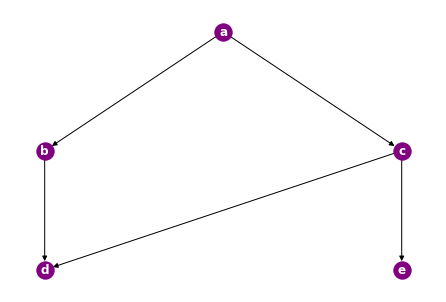

In [113]:
pos = findDrawingPositions(H)
nx.draw(H,pos , with_labels = True, node_color = 'purple', font_color = 'white', font_weight = 'bold')